<a href="https://colab.research.google.com/github/mauricioaalmeida/ONE-TelecomX_parte2-/blob/main/ONE_TelecomX_BR_Parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Telecom X - Análise de Evasão de Clientes - Parte 2


🎯 Missão

A missão desse trabalho é desenvolver modelos preditivos capazes de prever quais clientes têm maior chance de cancelar seus serviços.

A empresa quer antecipar o problema da evasão, e cabe a você construir um pipeline robusto para essa etapa inicial de modelagem.

🧠 Objetivos do Desafio

   1. Preparar os dados para a modelagem (tratamento, encoding, normalização).

   2. Realizar análise de correlação e seleção de variáveis.

   3. Treinar dois ou mais modelos de classificação.

   4. Avaliar o desempenho dos modelos com métricas.

   5. Interpretar os resultados, incluindo a importância das variáveis.

   6. Criar uma conclusão estratégica apontando os principais fatores que influenciam a evasão.

🧰 Ferramentas:

  - Google Colab
  - Python
  - Pandas
  - Scikit-Learn
  - MatplotLib
  - Seaborn
  

# Material de apoio:

### Dicionário de dados original

  

    customerID: número de identificação único de cada cliente
    Churn: se o cliente deixou ou não a empresa
    gender: gênero (masculino e feminino)
    SeniorCitizen: informação sobre um cliente ter ou não idade igual ou maior que 65 anos
    Partner: se o cliente possui ou não um parceiro ou parceira
    Dependents: se o cliente possui ou não dependentes
    tenure: meses de contrato do cliente
    PhoneService: assinatura de serviço telefônico
    MultipleLines: assisnatura de mais de uma linha de telefone
    InternetService: assinatura de um provedor internet
    OnlineSecurity: assinatura adicional de segurança online
    OnlineBackup: assinatura adicional de backup online
    DeviceProtection: assinatura adicional de proteção no dispositivo
    TechSupport: assinatura adicional de suporte técnico, menos tempo de espera
    StreamingTV: assinatura de TV a cabo
    StreamingMovies: assinatura de streaming de filmes
    Contract: tipo de contrato
    PaperlessBilling: se o cliente prefere receber online a fatura
    PaymentMethod: forma de pagamento
    Charges.Monthly: total de todos os serviços do cliente por mês
    Charges.Total: total gasto pelo cliente


Novo Dicionário de dados

- ID_Cliente (customerID): número de identificação único de cada cliente
- Churn (Churn): se o cliente deixou ou não a empresa
- Genero (gender): gênero (masculino e feminino)
- Idoso (SeniorCitizen): informação sobre um cliente ter ou não idade igual ou maior que 65 anos
- Casal (Partner): se o cliente possui ou não um parceiro ou parceira
- Dependentes (Dependents): se o cliente possui ou não dependentes
- Tempo_Contrato (tenure): meses de contrato do cliente
- Servico_Telefone (PhoneService): assinatura de serviço telefônico
- Servico_MultiplasLinhas (MultipleLines): assinatura de mais de uma linha de telefone
- Servico_Internet (InternetService): assinatura de um provedor internet
- Opt_OnlineSecurity (OnlineSecurity): assinatura adicional de segurança online
- Opt_OnlineBackup (OnlineBackup): assinatura adicional de backup online
- Opt_DeviceProtection (DeviceProtection): assinatura adicional de proteção no dispositivo
- Opt_TechSupport (TechSupport): assinatura adicional de suporte técnico, menos tempo de espera
- Opt_StreamingTV (StreamingTV): assinatura de TV a cabo
- Opt_StreamingMovies (StreamingMovies): assinatura de streaming de filmes
- Tipo_Contrato (Contract): tipo de contrato
- FaturaOnline (PaperlessBilling): se o cliente prefere receber online a fatura
- Forma_Pagto (PaymentMethod): forma de pagamento
- Conta_Mensal (Charges.Monthly): total de todos os serviços do cliente por mês
- Conta_Diarias (N/A): total de todos os serviços do cliente por mês
- Conta_Total (Charges.Total): total gasto pelo cliente


## Preparação do ambiente:

In [1]:
# Importação de Bibliotecas básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
import os

In [2]:
#Criar a estrutura de diretórios para a armazenar os dados
!mkdir -p data
!mkdir -p data/bronze
!mkdir -p data/prata
!mkdir -p data/ouro
!mkdir -p data/Images

In [3]:
url ='https://raw.githubusercontent.com/mauricioaalmeida/ONE-TelecomX/refs/heads/main/data/prata/TelecomX_Data.parquet'
r = requests.get(url)
with open('data/prata/TelecomX_Data.parquet', 'wb') as f:
    f.write(r.content)

#🎲 1. Preparar os dados para a modelagem (tratamento, encoding, normalização).

### Carga dos dados

In [4]:
#Iniciando com o arquivo Parquet salvo na camada prata:
df = pd.read_parquet('data/prata/TelecomX_Data.parquet')


### Analise de Features

In [5]:
df.head()

,ID_Cliente,Churn,Genero,Idoso,Casal,Dependentes,Tempo_Contrato,Servico_Telefone,Servico_MultiplasLinhas,Servico_Internet,...,Opt_DeviceProtection,Opt_TechSupport,Opt_StreamingTV,Opt_StreamingMovies,Tipo_Contrato,FaturaOnline,Forma_Pagto,Conta_Mensal,Conta_Total,Conta_Diarias
0,0002-ORFBO,0,Feminino,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Masculino,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Masculino,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Masculino,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Feminino,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ID_Cliente               7032 non-null   object  
 1   Churn                    7032 non-null   int64   
 2   Genero                   7032 non-null   category
 3   Idoso                    7032 non-null   int64   
 4   Casal                    7032 non-null   int64   
 5   Dependentes              7032 non-null   int64   
 6   Tempo_Contrato           7032 non-null   int64   
 7   Servico_Telefone         7032 non-null   int64   
 8   Servico_MultiplasLinhas  7032 non-null   int64   
 9   Servico_Internet         7032 non-null   category
 10  Opt_OnlineSecurity       7032 non-null   int64   
 11  Opt_OnlineBackup         7032 non-null   int64   
 12  Opt_DeviceProtection     7032 non-null   int64   
 13  Opt_TechSupport          7032 non-null   int64   
 14  Opt_Streaming

In [7]:
df.nunique()

,0
ID_Cliente,7032
Churn,2
Genero,2
Idoso,2
Casal,2
Dependentes,2
Tempo_Contrato,72
Servico_Telefone,2
Servico_MultiplasLinhas,2
Servico_Internet,3


In [8]:
col_alvo = 'Churn'
col_id = 'ID_Cliente'

colunas = df.columns.tolist()
col_categoricas = df.select_dtypes(include=['object','category']).columns.tolist()
col_numericas = df.select_dtypes(include=['number']).columns.tolist()
col_categoricas.remove(col_id)
col_numericas.remove(col_alvo)
print (f'Categoricas: {col_categoricas}')
print (f'Numéricas: {col_numericas}')

Categoricas: ['Genero', 'Servico_Internet', 'Tipo_Contrato', 'Forma_Pagto']
Numéricas: ['Idoso', 'Casal', 'Dependentes', 'Tempo_Contrato', 'Servico_Telefone', 'Servico_MultiplasLinhas', 'Opt_OnlineSecurity', 'Opt_OnlineBackup', 'Opt_DeviceProtection', 'Opt_TechSupport', 'Opt_StreamingTV', 'Opt_StreamingMovies', 'FaturaOnline', 'Conta_Mensal', 'Conta_Total', 'Conta_Diarias']


In [9]:
col_numericas_binarias = ['Idoso', 'Casal', 'Dependentes',  'Servico_Telefone', 'Servico_MultiplasLinhas', 'Opt_OnlineSecurity', 'Opt_OnlineBackup', 'Opt_DeviceProtection', 'Opt_TechSupport', 'Opt_StreamingTV', 'Opt_StreamingMovies', 'FaturaOnline']
col_numericas_discretas = ['Tempo_Contrato']
col_numericas_continuas = ['Conta_Mensal', 'Conta_Total', 'Conta_Diarias']

In [10]:
# Verificação das colunas binarias:
for col in col_numericas_binarias:
  print(f'{col}: {df[col].unique()}')


Idoso: [0 1]
Casal: [1 0]
Dependentes: [1 0]
Servico_Telefone: [1 0]
Servico_MultiplasLinhas: [0 1]
Opt_OnlineSecurity: [0 1]
Opt_OnlineBackup: [1 0]
Opt_DeviceProtection: [0 1]
Opt_TechSupport: [1 0]
Opt_StreamingTV: [1 0]
Opt_StreamingMovies: [0 1]
FaturaOnline: [1 0]


In [11]:
# Verificação das colunas discretas:
for col in col_numericas_discretas:
  print(f'{col}: {df[col].unique()}')


Tempo_Contrato: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42]


<Axes: xlabel='Tempo_Contrato', ylabel='Count'>

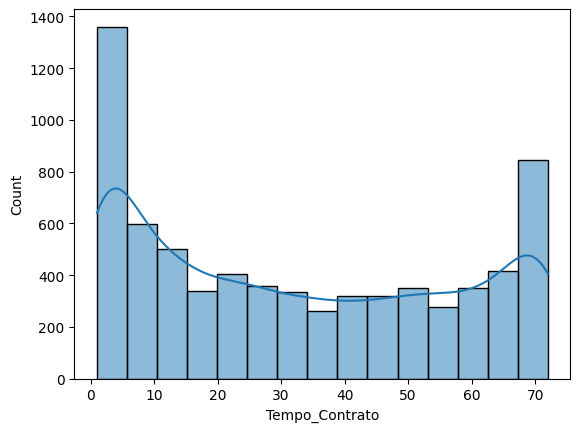

In [12]:
sns.histplot(df['Tempo_Contrato'], kde=True)

In [13]:
# Verificação das colunas contínuas:
for col in col_numericas_continuas:
  print(f'{col}: Min:{df[col].min()} - Media:{df[col].mean()} - Max:{df[col].max()}')

Conta_Mensal: Min:18.25 - Media:64.79820819112628 - Max:118.75
Conta_Total: Min:18.8 - Media:2283.3004408418656 - Max:8684.8
Conta_Diarias: Min:0.6083333333333333 - Media:2.1599402730375425 - Max:3.9583333333333335


<Axes: xlabel='Conta_Diarias', ylabel='Count'>

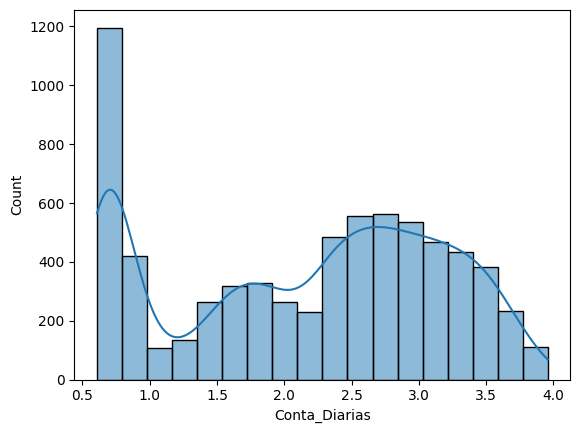

In [14]:
sns.histplot(df['Conta_Diarias'], kde=True)


In [15]:
# Verificação das colunas categoricas:
for col in col_categoricas:
  print(f'{col}: {df[col].unique()}')
  print('--------------------------------')

Genero: ['Feminino', 'Masculino']
Categories (2, object): ['Feminino', 'Masculino']
--------------------------------
Servico_Internet: ['DSL', 'Fiber optic', 'No']
Categories (3, object): ['DSL', 'Fiber optic', 'No']
--------------------------------
Tipo_Contrato: ['One year', 'Month-to-month', 'Two year']
Categories (3, object): ['Month-to-month', 'One year', 'Two year']
--------------------------------
Forma_Pagto: ['Mailed check', 'Electronic check', 'Credit card (automatic)', 'Bank transfer (automatic)']
Categories (4, object): ['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check',
                         'Mailed check']
--------------------------------


In [16]:
# Tratar a coluna Forma_Pagto
df['Forma_Pagto'] = df['Forma_Pagto'].str.replace(' (automatic)', '')
df['Forma_Pagto'].unique()

array(['Mailed check', 'Electronic check', 'Credit card', 'Bank transfer'],
      dtype=object)

### Eliminar colunas desnecessárias:

In [17]:
col_remover = ['ID_Cliente','Conta_Mensal', 'Conta_Total']
df = df.drop(columns=col_remover, axis=1)

### Transformar colunas categoricas

In [18]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import LabelEncoder

In [31]:
col_categoricas

['Genero', 'Servico_Internet', 'Tipo_Contrato', 'Forma_Pagto']

In [19]:
one_hot = make_column_transformer((
    OneHotEncoder( handle_unknown= 'ignore'),#drop = 'if_binary'),
    col_categoricas),
    remainder='passthrough',
    sparse_threshold=0)

df_enc = one_hot.fit_transform(df)

In [20]:
one_hot.get_feature_names_out()

array(['onehotencoder__Genero_Feminino',
       'onehotencoder__Genero_Masculino',
       'onehotencoder__Servico_Internet_DSL',
       'onehotencoder__Servico_Internet_Fiber optic',
       'onehotencoder__Servico_Internet_No',
       'onehotencoder__Tipo_Contrato_Month-to-month',
       'onehotencoder__Tipo_Contrato_One year',
       'onehotencoder__Tipo_Contrato_Two year',
       'onehotencoder__Forma_Pagto_Bank transfer',
       'onehotencoder__Forma_Pagto_Credit card',
       'onehotencoder__Forma_Pagto_Electronic check',
       'onehotencoder__Forma_Pagto_Mailed check', 'remainder__Churn',
       'remainder__Idoso', 'remainder__Casal', 'remainder__Dependentes',
       'remainder__Tempo_Contrato', 'remainder__Servico_Telefone',
       'remainder__Servico_MultiplasLinhas',
       'remainder__Opt_OnlineSecurity', 'remainder__Opt_OnlineBackup',
       'remainder__Opt_DeviceProtection', 'remainder__Opt_TechSupport',
       'remainder__Opt_StreamingTV', 'remainder__Opt_StreamingMovies',

In [23]:
df_enc = pd.DataFrame(df_enc, columns=one_hot.get_feature_names_out()).copy()
df_enc

,onehotencoder__Genero_Feminino,onehotencoder__Genero_Masculino,onehotencoder__Servico_Internet_DSL,onehotencoder__Servico_Internet_Fiber optic,onehotencoder__Servico_Internet_No,onehotencoder__Tipo_Contrato_Month-to-month,onehotencoder__Tipo_Contrato_One year,onehotencoder__Tipo_Contrato_Two year,onehotencoder__Forma_Pagto_Bank transfer,onehotencoder__Forma_Pagto_Credit card,...,remainder__Servico_Telefone,remainder__Servico_MultiplasLinhas,remainder__Opt_OnlineSecurity,remainder__Opt_OnlineBackup,remainder__Opt_DeviceProtection,remainder__Opt_TechSupport,remainder__Opt_StreamingTV,remainder__Opt_StreamingMovies,remainder__FaturaOnline,remainder__Conta_Diarias
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,2.186667
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.996667
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.463333
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,3.266667
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.838333
7028,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.836667
7029,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.676667
7030,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,2.261667


### Normalizar colunas Numericas discretas e contínuas

In [29]:
col_numericas

['Idoso',
 'Casal',
 'Dependentes',
 'Tempo_Contrato',
 'Servico_Telefone',
 'Servico_MultiplasLinhas',
 'Opt_OnlineSecurity',
 'Opt_OnlineBackup',
 'Opt_DeviceProtection',
 'Opt_TechSupport',
 'Opt_StreamingTV',
 'Opt_StreamingMovies',
 'FaturaOnline',
 'Conta_Mensal',
 'Conta_Total',
 'Conta_Diarias']

In [35]:
col_normalizar = []
for col in col_numericas:
  if col not in col_numericas_binarias:
    col_normalizar.append('remainder__'+col)
col_normalizar

['remainder__Tempo_Contrato', 'remainder__Conta_Diarias']

In [36]:
for col in col_normalizar:
  df_enc[col] = MinMaxScaler().fit_transform(df_enc[[col]])


In [37]:
df_enc.head()

,onehotencoder__Genero_Feminino,onehotencoder__Genero_Masculino,onehotencoder__Servico_Internet_DSL,onehotencoder__Servico_Internet_Fiber optic,onehotencoder__Servico_Internet_No,onehotencoder__Tipo_Contrato_Month-to-month,onehotencoder__Tipo_Contrato_One year,onehotencoder__Tipo_Contrato_Two year,onehotencoder__Forma_Pagto_Bank transfer,onehotencoder__Forma_Pagto_Credit card,...,remainder__Servico_Telefone,remainder__Servico_MultiplasLinhas,remainder__Opt_OnlineSecurity,remainder__Opt_OnlineBackup,remainder__Opt_DeviceProtection,remainder__Opt_TechSupport,remainder__Opt_StreamingTV,remainder__Opt_StreamingMovies,remainder__FaturaOnline,remainder__Conta_Diarias
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.471144
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.414428
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.553731
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.793532
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.653234


<Axes: xlabel='remainder__Conta_Diarias', ylabel='Count'>

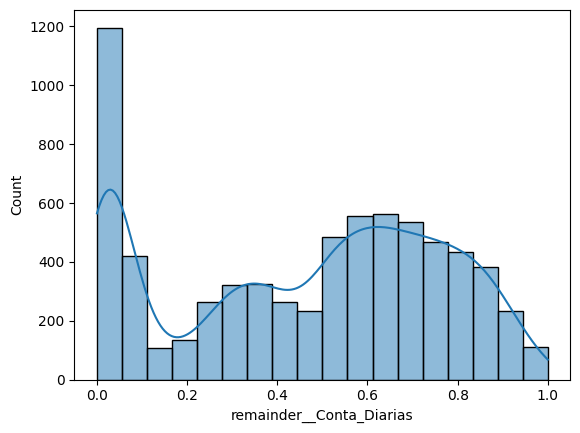

In [39]:
sns.histplot(df_enc['remainder__Conta_Diarias'], kde=True)

<Axes: xlabel='remainder__Tempo_Contrato', ylabel='Count'>

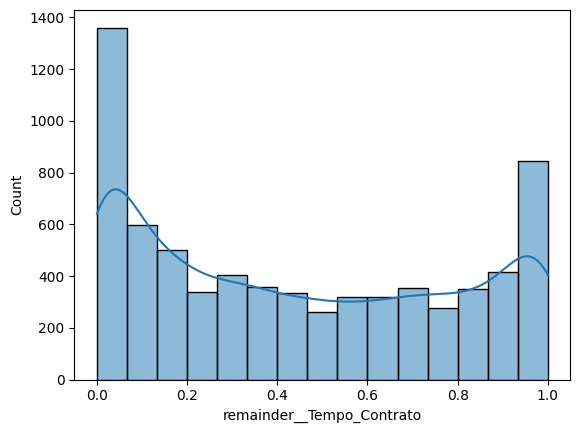

In [40]:
sns.histplot(df_enc['remainder__Tempo_Contrato'], kde=True)

### Separando o dataframe em Treino, Teste e Validação

In [45]:
x = df_enc.drop(columns=['remainder__'+col_alvo], axis=1)
y = df_enc['remainder__'+col_alvo]

print(x.shape)
print(y.shape)

(7032, 26)
(7032,)


In [46]:
from sklearn.model_selection import train_test_split

In [53]:
x, x_test, y, y_test = train_test_split(x, y, test_size=0.15, stratify=y, random_state=5)
x_train, x_val, y_train, y_val = train_test_split(x, y, stratify=y, random_state=5)

print('               X      -     Y')
print(f'Treino   : {x_train.shape} - {y_train.shape}')
print(f'Validação: {x_val.shape}  - {y_val.shape}')
print(f'Teste    : {x_test.shape}  - {y_test.shape}')


               X      -     Y
Treino   : (1689, 26) - (1689,)
Validação: (564, 26)  - (564,)
Teste    : (398, 26)  - (398,)


#📊 2. Realizar análise de correlação e seleção de variáveis.

In [56]:
from sklearn.metrics import mean_squared_error,root_mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def calcular_metricas_regressao(y_test, y_pred):

    rmse = root_mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    metricas = {
        'Raiz do Erro Quadrático Médio': round(rmse, 4),
        'Erro Absoluto Médio': round(mae, 4),
        'R2 Score': round(r2, 4)
    }

    return metricas

## Linha de Base - DummyRegressor

In [61]:
from sklearn.dummy import DummyRegressor

dummy_regr = DummyRegressor(strategy='mean')
dummy_regr.fit(x_train, y_train)


DummyRegressor()

In [62]:
dummy_regr.score(x_test, y_test)

-1.2483263891471807e-06

In [65]:
y_pred_dummy = dummy_regr.predict(x_test)
print(calcular_metricas_regressao(y_test, y_pred_dummy))
df_result = pd.DataFrame(calcular_metricas_regressao(y_test, y_pred_dummy), index=['DummyRegressor'])

{'Raiz do Erro Quadrático Médio': 0.442, 'Erro Absoluto Médio': 0.3906, 'R2 Score': -0.0}


In [69]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(max_depth=5, random_state=42)
model_rf.fit(x_train, y_train)
y_pred_rf = model_rf.predict(x_test)
print(calcular_metricas_regressao(y_test, y_pred_rf))
df_result = pd.concat([df_result, pd.DataFrame(calcular_metricas_regressao(y_test, y_pred_rf), index=['RandomForestRegressor-5'])])

{'Raiz do Erro Quadrático Médio': 0.3718, 'Erro Absoluto Médio': 0.2786, 'R2 Score': 0.2925}


In [70]:
df_result

,Raiz do Erro Quadrático Médio,Erro Absoluto Médio,R2 Score
DummyRegressor,0.4420,0.3906,-0.0000
RandomForestRegressor,0.3718,0.2786,0.2925
RandomForestRegressor-5,0.3718,0.2786,0.2925


#Feature Engineer - Seleção de recursos

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


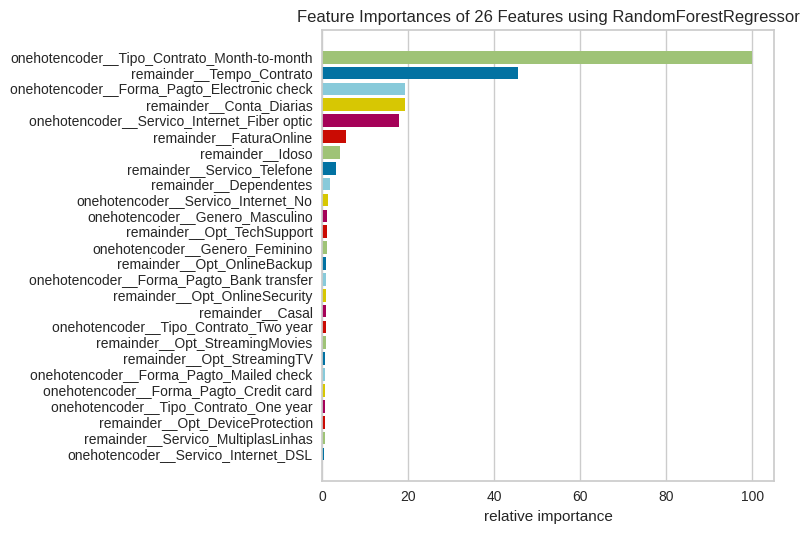

<Axes: title={'center': 'Feature Importances of 26 Features using RandomForestRegressor'}, xlabel='relative importance'>

In [74]:
from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(model_rf)
viz.fit(x_train, y_train)
viz.show()

Não mostrar a importância relativa e apenas as mais importantes

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


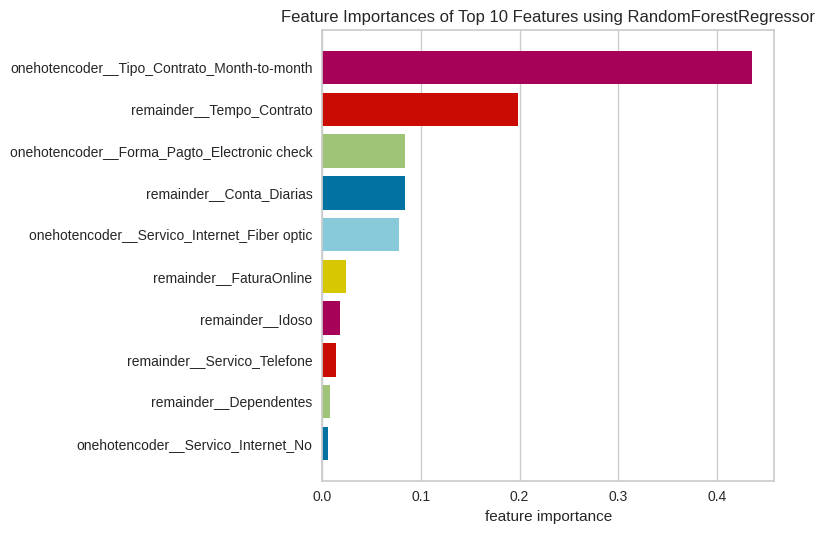

<Axes: title={'center': 'Feature Importances of Top 10 Features using RandomForestRegressor'}, xlabel='feature importance'>

In [76]:
viz = FeatureImportances(model_rf, relative=False, topn=10)
viz.fit(x_train, y_train)
viz.show()


In [77]:
model_rf.feature_importances_

array([0.00424141, 0.00448277, 0.00161306, 0.07794729, 0.00616189,
       0.43625488, 0.00250225, 0.00340205, 0.00367443, 0.00258118,
       0.08379646, 0.00279083, 0.01802441, 0.00348464, 0.00733126,
       0.19797572, 0.01353489, 0.00232762, 0.00355057, 0.00376197,
       0.00248019, 0.00438881, 0.00303551, 0.0033567 , 0.0239167 ,
       0.08338252])

In [78]:
importances = model_rf.feature_importances_
feature_importances = pd.DataFrame({'feature': x_train.columns, 'importance': importances})
feature_importances = feature_importances.sort_values('importance', ascending=False)
feature_importances

,feature,importance
5,onehotencoder__Tipo_Contrato_Month-to-month,0.436255
15,remainder__Tempo_Contrato,0.197976
10,onehotencoder__Forma_Pagto_Electronic check,0.083796
25,remainder__Conta_Diarias,0.083383
3,onehotencoder__Servico_Internet_Fiber optic,0.077947
24,remainder__FaturaOnline,0.023917
12,remainder__Idoso,0.018024
16,remainder__Servico_Telefone,0.013535
14,remainder__Dependentes,0.007331
4,onehotencoder__Servico_Internet_No,0.006162


In [79]:
results_df = pd.DataFrame(index=['MAE', 'RMSE', 'r2'])

model_selected_features = RandomForestRegressor(max_depth=5, random_state=42)

for count in [1, 5, 10, 15, 20, 20, 25, 30]:
  selected_features = feature_importances['feature'].values[:count]

  x_train_selected = x_train[selected_features]
  x_test_selected = x_test[selected_features]

  model_selected_features.fit(x_train_selected, y_train)
  y_pred_selected = model_selected_features.predict(x_test_selected)
  metricas = calcular_metricas_regressao(y_test, y_pred_selected)
  results_df[f'top_{count}'] = list(metricas.values())

results_df


,top_1,top_5,top_10,top_15,top_20,top_25,top_30
MAE,0.4002,0.3774,0.3715,0.3718,0.3723,0.3719,0.3721
RMSE,0.3200,0.2791,0.2778,0.2792,0.2789,0.2788,0.2788
r2,0.1805,0.2709,0.2936,0.2924,0.2907,0.2921,0.2913


In [80]:
results_df = pd.DataFrame(index=['MAE', 'RMSE', 'r2'])

model_selected_features = RandomForestRegressor(max_depth=5, random_state=42)

for count in range(5,16):
  selected_features = feature_importances['feature'].values[:count]

  x_train_selected = x_train[selected_features]
  x_test_selected = x_test[selected_features]

  model_selected_features.fit(x_train_selected, y_train)
  y_pred_selected = model_selected_features.predict(x_test_selected)
  metricas = calcular_metricas_regressao(y_test, y_pred_selected)
  results_df[f'top_{count}'] = list(metricas.values())

results_df

,top_5,top_6,top_7,top_8,top_9,top_10,top_11,top_12,top_13,top_14,top_15
MAE,0.3774,0.3752,0.3733,0.3716,0.3716,0.3715,0.3721,0.3721,0.3723,0.3720,0.3718
RMSE,0.2791,0.2783,0.2780,0.2774,0.2778,0.2778,0.2788,0.2790,0.2791,0.2791,0.2792
r2,0.2709,0.2797,0.2870,0.2934,0.2933,0.2936,0.2915,0.2912,0.2908,0.2917,0.2924


OBS: Até 12 Features há uma variação significativa, porém após 13 o resultado permanece praticamente constante, portanto vamos treinar o modelo apenas com 12

In [ ]:
selected_features = feature_importances['feature'].values[:12]

X_selected_features = X[selected_features]

X_train, X_test, y_train, y_test = train_test_split(X_selected_features, y, random_state=42)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


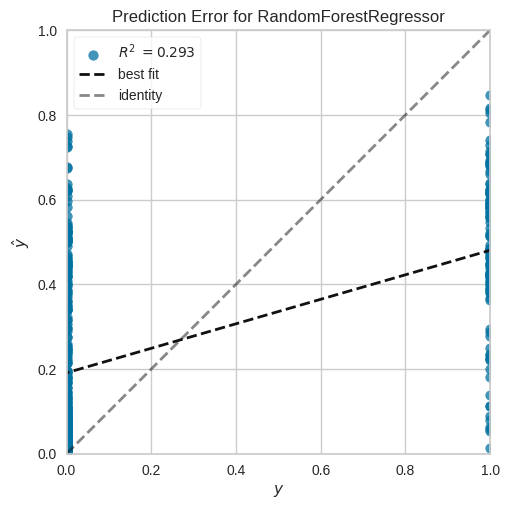

In [72]:
from yellowbrick.regressor import prediction_error

visualizer = prediction_error(model_rf, x_train, y_train, x_test, y_test)

#🔧 3. Treinar dois ou mais modelos de classificação.


#📈 4. Avaliar o desempenho dos modelos com métricas.

#🔎 5. Interpretar os resultados, incluindo a importância das variáveis.

# 🎯 6. Conclusão:
criar uma conclusão estratégica apontando os principais fatores que influenciam a evasão.

## Análise Descritiva

In [ ]:
df_ouro.describe()

Uma análise descritiva mais detalhada será realizada no BD Star Schema, que será criado a seguir

In [ ]:
#Analise Descritiva resumida:
print(f'Clientes                  : {df_ouro.ID_Cliente.count()}')
print(f'   -           Cancelados : {df_ouro.query("Churn == 1").ID_Cliente.count()}')
print(f'   -       Não Cancelados : {df_ouro.query("Churn == 0").ID_Cliente.count()}')
print(f'   -   Média cancelamento : {df_ouro.query("Churn == 1").ID_Cliente.count()/df_ouro.ID_Cliente.count():.2%} ')
print()
print(f'Tempo de Contrato:')
print(f'   -               Máximo : {df_ouro.Tempo_Contrato.max()} meses')
print(f'   -               Mínimo : {df_ouro.Tempo_Contrato.min()} meses')
print(f'   -                Médio : {df_ouro.Tempo_Contrato.mean():.2f} meses')
print(f'   -        Desvio padrão : {df_ouro.Tempo_Contrato.std():.2f} meses')
print(f'   -              Mediana : {df_ouro.Tempo_Contrato.median():.2f} meses')
print()
print(f'Conta Mensal:')
print(f'   -               Máximo : R${df_ouro.Conta_Mensal.max():.2f}')
print(f'   -               Mínimo : R${df_ouro.Conta_Mensal.min():.2f}')
print(f'   -                Médio : R${df_ouro.Conta_Mensal.mean():.2f}')
print(f'   -        Desvio padrão : R${df_ouro.Conta_Mensal.std():.2f}')
print(f'   -              Mediana : R${df_ouro.Conta_Mensal.median():.2f}')
print()
print(f'Conta Total:')
print(f'   -               Máximo : R${df_ouro.Conta_Total.max():.2f}')
print(f'   -               Mínimo : R${df_ouro.Conta_Total.min():.2f}')
print(f'   -                Médio : R${df_ouro.Conta_Total.mean():.2f}')
print(f'   -        Desvio padrão : R${df_ouro.Conta_Total.std():.2f}')
print(f'   -              Mediana : R${df_ouro.Conta_Total.median():.2f}')

In [ ]:
#Analise Descritiva Perfil Clientes e Serviços:
print(f'Clientes                  : {df_ouro.ID_Cliente.count()}')
print(f'   -               Idosos : {df_ouro.Idoso.sum()} = {df_ouro.Idoso.sum()/df_ouro.ID_Cliente.count():.2%} ')
print(f'   -               Casais : {df_ouro.Casal.sum()} = {df_ouro.Casal.sum()/df_ouro.ID_Cliente.count():.2%} ')
print(f'   -      Com dependentes : {df_ouro.Dependentes.sum()} = {df_ouro.Dependentes.sum()/df_ouro.ID_Cliente.count():.2%} ')
print()
print(f'Serviços do Contrato:')
print(f'   -             Telefone : {df_ouro.Servico_Telefone.sum()} = {df_ouro.Servico_Telefone.sum()/df_ouro.ID_Cliente.count():.2%} ')
print(f'   -     Multiplas Linhas : {df_ouro.Servico_MultiplasLinhas.sum()} = {df_ouro.Servico_MultiplasLinhas.sum()/df_ouro.ID_Cliente.count():.2%} ')
Internet_fo = df_ouro.query("Servico_Internet == 'Fiber optic'").ID_Cliente.count()
Internet_DSL = df_ouro.query("Servico_Internet == 'DSL'").ID_Cliente.count()
Internet_No = df_ouro.query("Servico_Internet == 'No'").ID_Cliente.count()
print(f'   -       Internet Fibra : {Internet_fo} = {Internet_fo/df_ouro.ID_Cliente.count():.2%} ')
print(f'   -         Internet DSL : {Internet_DSL} = {Internet_DSL/df_ouro.ID_Cliente.count():.2%} ')
print(f'   -         Sem Internet : {Internet_No} = {Internet_No/df_ouro.ID_Cliente.count():.2%} ')
print()
print(f'Opcionais do Contrato:')
print(f'   -      Online Security : {df_ouro.Opt_OnlineSecurity.sum()} = {df_ouro.Opt_OnlineSecurity.sum()/df_ouro.ID_Cliente.count():.2%} ')
print(f'   -    Device Protection : {df_ouro.Opt_DeviceProtection.sum()} = {df_ouro.Opt_DeviceProtection.sum()/df_ouro.ID_Cliente.count():.2%} ')
print(f'   -         Tech Support : {df_ouro.Opt_TechSupport.sum()} = {df_ouro.Opt_TechSupport.sum()/df_ouro.ID_Cliente.count():.2%} ')
print(f'   -         Streaming TV : {df_ouro.Opt_StreamingTV.sum()} = {df_ouro.Opt_StreamingTV.sum()/df_ouro.ID_Cliente.count():.2%} ')
print(f'   -     Streaming Movies : {df_ouro.Opt_StreamingMovies.sum()} = {df_ouro.Opt_StreamingMovies.sum()/df_ouro.ID_Cliente.count():.2%} ')
print(f'   -        Fatura Online : {df_ouro.Opt_TechSupport.sum()} = {df_ouro.FaturaOnline.sum()/df_ouro.ID_Cliente.count():.2%} ')
print()
print(f'Tipo do Contrato:')
Tipo_m = df_ouro.query("Tipo_Contrato == 'Month-to-month'").ID_Cliente.count()
print(f'   -              Mensal : {Tipo_m} = {Tipo_m/df_ouro.ID_Cliente.count():.2%} ')
Tipo_m = df_ouro.query("Tipo_Contrato == 'One year'").ID_Cliente.count()
print(f'   -               Anual : {Tipo_m} = {Tipo_m/df_ouro.ID_Cliente.count():.2%} ')
Tipo_m = df_ouro.query("Tipo_Contrato == 'Two year'").ID_Cliente.count()
print(f'   -            Bi-Anual : {Tipo_m} = {Tipo_m/df_ouro.ID_Cliente.count():.2%} ')
print()
print(f'Forma de Pagamento:')
pgto = df_ouro.query("Forma_Pagto == 'Electronic check'").ID_Cliente.count()
print(f'   -     Electronic check : {pgto} = {pgto/df_ouro.ID_Cliente.count():.2%} ')
pgto = df_ouro.query("Forma_Pagto == 'Mailed check'").ID_Cliente.count()
print(f'   -         Mailed check : {pgto} = {pgto/df_ouro.ID_Cliente.count():.2%} ')
pgto = df_ouro.query("Forma_Pagto == 'Bank transfer (automatic)'").ID_Cliente.count()
print(f'   - Bank transfer (auto) : {pgto} = {pgto/df_ouro.ID_Cliente.count():.2%} ')
pgto = df_ouro.query("Forma_Pagto == 'Credit card (automatic)'").ID_Cliente.count()
print(f'   -   Credit card (auto) : {pgto} = {pgto/df_ouro.ID_Cliente.count():.2%} ')

#📄Relatorio Final

# Relatório Final - Análise de Evasão de Clientes Telecom X

## Introdução

Este relatório apresenta uma análise exploratória dos dados de clientes da Telecom X com o objetivo de identificar os fatores que contribuem para a evasão de clientes (Churn). A empresa busca entender o comportamento dos clientes que cancelam seus serviços para desenvolver estratégias eficazes de retenção.

## Limpeza e Tratamento de Dados

Os dados foram extraídos de uma fonte JSON e processados utilizando a arquitetura Medalhão, dividindo o trabalho em três camadas:

- **Camada Bronze:** Os dados brutos foram carregados diretamente do arquivo JSON.
- **Camada Prata:** Nesta camada, os dados foram limpos e transformados. As colunas com informações aninhadas em formato JSON foram normalizadas. Valores inconsistentes na coluna `Charges.Total` foram tratados, e a coluna foi convertida para o tipo numérico correto. Clientes com `tenure` igual a zero foram removidos, pois não forneciam informações relevantes para a análise de churn. Colunas binárias ('Yes'/'No' ou similares) foram convertidas para 1 e 0 para facilitar a análise numérica. Colunas categóricas como 'gender', 'Contract', 'PaymentMethod', e 'InternetService' foram convertidas para o tipo 'category' do pandas. Uma nova coluna `Contas_Diarias` foi criada calculando o gasto diário. As colunas foram traduzidas para o português e renomeadas para melhor compreensão.
- **Camada Ouro:** Os dados limpos e transformados da camada Prata foram carregados e estruturados em um esquema estrela utilizando DuckDB para facilitar a análise e consulta. Foram criadas as tabelas dim_clientes, dim_tipos_servicos, fato_servicos_clientes, dim_contratos e fato_gastos.

## Análise Exploratória de Dados (EDA)

Nesta seção, foram realizadas diversas análises para identificar padrões e tendências nos dados:

### Análise Descritiva

Foram apresentadas estatísticas descritivas gerais sobre o volume de clientes, taxa de churn, tempo de contrato e valores de contas mensais e totais.

In [ ]:
#Analise Descritiva resumida:
print(f'Clientes                  : {df_ouro.ID_Cliente.count()}')
print(f'   -           Cancelados : {df_ouro.query("Churn == 1").ID_Cliente.count()}')
print(f'   -       Não Cancelados : {df_ouro.query("Churn == 0").ID_Cliente.count()}')
print(f'   -   Média cancelamento : {df_ouro.query("Churn == 1").ID_Cliente.count()/df_ouro.ID_Cliente.count():.2%} ')
print()
print(f'Tempo de Contrato:')
print(f'   -               Máximo : {df_ouro.Tempo_Contrato.max()} meses')
print(f'   -               Mínimo : {df_ouro.Tempo_Contrato.min()} meses')
print(f'   -                Médio : {df_ouro.Tempo_Contrato.mean():.2f} meses')
print(f'   -        Desvio padrão : {df_ouro.Tempo_Contrato.std():.2f} meses')
print(f'   -              Mediana : {df_ouro.Tempo_Contrato.median():.2f} meses')
print()
print(f'Conta Mensal:')
print(f'   -               Máximo : R${df_ouro.Conta_Mensal.max():.2f}')
print(f'   -               Mínimo : R${df_ouro.Conta_Mensal.min():.2f}')
print(f'   -                Médio : R${df_ouro.Conta_Mensal.mean():.2f}')
print(f'   -        Desvio padrão : R${df_ouro.Conta_Mensal.std():.2f}')
print(f'   -              Mediana : R${df_ouro.Conta_Mensal.median():.2f}')
print()
print(f'Conta Total:')
print(f'   -               Máximo : R${df_ouro.Conta_Total.max():.2f}')
print(f'   -               Mínimo : R${df_ouro.Conta_Total.min():.2f}')
print(f'   -                Médio : R${df_ouro.Conta_Total.mean():.2f}')
print(f'   -        Desvio padrão : R${df_ouro.Conta_Total.std():.2f}')
print(f'   -              Mediana : R${df_ouro.Conta_Total.median():.2f}')

### Análise de Perfil dos Clientes

Foram analisados os perfis dos clientes em relação a gênero, faixa etária (idoso/não idoso), estado civil (casal/solteiro) e dependentes.

In [ ]:
with plt.style.context('seaborn-v0_8-dark'):
  max_y = 1800
  cores = sns.color_palette("dark")
  fig, ax = plt.subplots(figsize=(10,6))
  fig.suptitle('Perfil dos Clientes')
  bars = ax.barh(df_perfil['Perfil'], df_perfil['Qde_Clientes'], color=cores)

  for i, bar in enumerate(bars):
      width = bar.get_width()
      percentage = df_perfil['Perc_Clientes'].iloc[i]
      ax.text(width + 50, bar.get_y() + bar.get_height() / 2,
              f'{percentage:.2f}%', ha='left', va='center', fontsize=10)

  ax.set_xlim(0, max_y)
  plt.savefig('data/Images/perfil_clientes.png')
  plt.show()

In [ ]:
with plt.style.context('seaborn-v0_8-dark'):
  max_y = 7500
  cores = sns.color_palette("dark")
  fig, axs = plt.subplots(2,2,figsize=(10,6))
  fig.suptitle('Perfil dos Clientes')

  df_genero_plot = ouro_perfil_Cliente.groupby('Genero', observed=True)['Qde_Clientes'].sum().reset_index()
  bars = axs[0,0].bar(df_genero_plot['Genero'], df_genero_plot['Qde_Clientes'], label='Genero', color = cores)
  for bar in bars:
    yval = bar.get_height()
    axs[0,0].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
  axs[0,0].set_title('Clientes por Genero')
  axs[0,0].set_ylim(0,max_y)

  df_idoso_plot = ouro_perfil_Cliente.groupby('Idoso', observed=True)['Qde_Clientes'].sum().reset_index()
  bars = axs[0,1].bar(df_idoso_plot['Idoso'], df_idoso_plot['Qde_Clientes'], label='Idoso', color = cores)
  for bar in bars:
    yval = bar.get_height()
    axs[0,1].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
  axs[0,1].set_title('Clientes por Faixa Etaria')
  axs[0,1].set_ylim(0,max_y)

  df_casado_plot = ouro_perfil_Cliente.groupby('Casal', observed=True)['Qde_Clientes'].sum().reset_index()
  bars = axs[1,0].bar(df_casado_plot['Casal'], df_casado_plot['Qde_Clientes'], label='Casado', color = cores)
  for bar in bars:
    yval = bar.get_height()
    axs[1,0].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
  axs[1,0].set_title('Clientes por Estado Civil')
  axs[1,0].set_ylim(0,max_y)

  df_dependente_plot = ouro_perfil_Cliente.groupby('Dependentes', observed=True)['Qde_Clientes'].sum().reset_index()
  bars = axs[1,1].bar(df_dependente_plot['Dependentes'], df_dependente_plot['Qde_Clientes'], label='Dependentes', color = cores)
  for bar in bars:
    yval = bar.get_height()
    axs[1,1].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
  axs[1,1].set_title('Clientes com Dependentes')
  axs[1,1].set_ylim(0,max_y)
  plt.savefig('data/Images/perfil_clientes2.png')
  plt.show()

### Análise de Gastos por Atributos dos Clientes

A análise dos gastos médios por diferentes atributos dos clientes revelou insights sobre o comportamento de consumo.

In [ ]:
with plt.style.context('seaborn-v0_8-dark'):
  max_y = 100
  cores = sns.color_palette("dark")
  fig, axs = plt.subplots(2,2,figsize=(10,6))
  fig.suptitle('Média de Gastos Mensais por Atributos dos Clientes')

  df_genero_plot = ouro_Gasto_Cliente.groupby('Genero', observed=True)['Media_Gasto_Mes'].mean().reset_index()
  bars = axs[0,0].bar(df_genero_plot['Genero'], df_genero_plot['Media_Gasto_Mes'], label='Genero', color = cores)
  for bar in bars:
    yval = bar.get_height()
    axs[0,0].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
  axs[0,0].set_title('Média por Genero')
  axs[0,0].set_ylim(0,max_y)

  df_idoso_plot = ouro_Gasto_Cliente.groupby('Idoso', observed=True)['Media_Gasto_Mes'].mean().reset_index()
  bars = axs[0,1].bar(df_idoso_plot['Idoso'], df_idoso_plot['Media_Gasto_Mes'], label='Idoso', color = cores)
  for bar in bars:
    yval = bar.get_height()
    axs[0,1].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
  axs[0,1].set_title('Média por Faixa Etária')
  axs[0,1].set_ylim(0,max_y)

  df_casado_plot = ouro_Gasto_Cliente.groupby('Casal', observed=True)['Media_Gasto_Mes'].mean().reset_index()
  bars = axs[1,0].bar(df_casado_plot['Casal'], df_casado_plot['Media_Gasto_Mes'], label='Idoso', color = cores)
  for bar in bars:
    yval = bar.get_height()
    axs[1,0].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
  axs[1,0].set_title('Média por Parceiros')
  axs[1,0].set_ylim(0,max_y)

  df_dependente_plot = ouro_Gasto_Cliente.groupby('Dependentes', observed=True)['Media_Gasto_Mes'].mean().reset_index()
  bars = axs[1,1].bar(df_dependente_plot['Dependentes'], df_dependente_plot['Media_Gasto_Mes'], label='Idoso', color = cores)
  for bar in bars:
    yval = bar.get_height()
    axs[1,1].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
  axs[1,1].set_title('Média por Dependentes')
  axs[1,1].set_ylim(0,max_y)
  plt.savefig('data/Images/Gastos_Mensais_Atributos_clientes.png')
  plt.show()

### Análise de Churn e Gastos por Atributos dos Contratos

A análise do churn e dos gastos em relação aos atributos dos contratos, como tipo de contrato, fatura online e forma de pagamento, forneceu informações sobre quais características contratuais estão mais associadas à evasão e aos gastos dos clientes.

In [ ]:
titulo = 'Clientes Ativos e Evadidos por Atributos do Contrato'
col_valores = 'Qde_Clientes'
col_pivot = ['','Tipo_Contrato','Fatura','Forma_Pagto']
col_grupos = 'Evasao'
titulos_axes = ['Evasao','Tipo de Contrato','Tipo de Fatura','Forma de Pagto']
legendas = ['Quantidade de Clientes','Quantidade de Clientes','Quantidade de Clientes','Quantidade de Clientes',
             '','','','']
lim_y = [ 5500, 5000, 5000, 5000]

df_graf= [pd.DataFrame() for _ in range(4)]

df_graf[0]  = ouro_Gasto_Contratos.groupby(col_grupos)[col_valores].sum().reset_index()
for i in range(1,4):
  df_graf[i] = pd.pivot_table(data=ouro_Gasto_Contratos, values=col_valores, index=col_grupos,columns= col_pivot[i], aggfunc='sum', fill_value=0, observed=True).reset_index()

graficos_atributos2(df_graf, titulos_axes, legendas, titulo, lim_y,'data/Images/Evadidos_Atributos_Contrato.png')

In [ ]:
titulo = 'Gastos Médios de Clientes Ativos e Evadidos por Atributos do Contrato'
col_valores = 'Media_Gasto_Mes'
col_pivot = ['','Tipo_Contrato','Fatura','Forma_Pagto']
col_grupos = 'Evasao'
titulos_axes = ['Evasao','Tipo de Contrato','Tipo de Fatura','Forma de Pagto']
legendas = ['Média Gastos/Mês','Média Gastos/Mês','Média Gastos/Mês','Média Gastos/Mês',
             '','','','']
lim_y = [ 150, 150, 150, 150]

df_graf= [pd.DataFrame() for _ in range(4)]

df_graf[0]  = ouro_Gasto_Contratos.groupby(col_grupos)[col_valores].mean().reset_index()
for i in range(1,4):
  df_graf[i] = pd.pivot_table(data=ouro_Gasto_Contratos, values=col_valores, index=col_grupos,columns= col_pivot[i], aggfunc='mean', fill_value=0, observed=True).reset_index()

graficos_atributos2(df_graf, titulos_axes, legendas, titulo, lim_y,'data/Images/Gastos_Evadidos_Atributos_Contrato.png')

### Análise de Churn por Atributos dos Serviços

A análise do churn em relação aos serviços contratados e opcionais ajudou a identificar quais serviços podem estar mais relacionados à evasão.

In [ ]:
titulo = 'Clientes Ativos e Evadidos por Opcionais do Contrato'
col_servicos = [ 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
col_grupos = ['Servico_Telefone','Servico_MultiplasLinhas','Internet_DSL','Internet_Fibra']
titulos_ax = ['Servico de Telefone','Servico de Multiplas Linhas','Internet DSL','Internet Fibra']
legendas = ['Contagem de Clientes','Contagem de Clientes','Contagem de Clientes','Contagem de Clientes',
             '','','','']
tamanho_barras = 0.15
df_graf= [pd.DataFrame() for _ in range(4)]
for i in range(4):
  df_graf[i] = ouro_Gasto_Servicos.query(col_grupos[i]).groupby('Evasao')[col_servicos].sum().reset_index()


graficos_atributos(df_graf, col_servicos,['Evasao','Evasao','Evasao','Evasao'], titulos_ax, legendas, tamanho_barras, titulo, 1000,'data/Images/Evadidos_Opcionais_Contrato.png')

### Análise de Churn por Atributos dos Clientes

A análise do churn em relação aos atributos de perfil dos clientes (gênero, idade, estado civil, dependentes) ajudou a entender se certos grupos demográficos apresentam maior tendência a cancelar.

In [ ]:
titulo = 'Análise de Churn por atributos dos clientes'
col_valores = 'Qde_Clientes'
col_pivot = ['Genero','Idoso','Casal','Dependentes']
col_grupos =  'Evasao'
titulos_axes = ['Genero','Idoso','Casal','Dependentes']
legendas = ['Contagem de Clientes','Contagem de Clientes','Contagem de Clientes','Contagem de Clientes',
             '','','','']
lim_y = [ 5000, 5000, 5000, 5000]

df_graf= [pd.DataFrame() for _ in range(4)]


for i in range(4):
  df_graf[i] = pd.pivot_table(data=ouro_Churn_Cliente, values=col_valores, index=col_pivot[i],columns=col_grupos , aggfunc='sum', fill_value=0, observed=True).reset_index()

graficos_atributos2(df_graf, titulos_axes, legendas, titulo, lim_y,'data/Images/perfil_clientes3.png')


### Contagem de Evasão por Variáveis Numéricas

A análise da distribuição de variáveis numéricas, como tempo de contrato e gastos, entre clientes evadidos e ativos, ajudou a identificar possíveis limiares ou padrões associados ao churn.

In [ ]:
with plt.style.context('seaborn-v0_8-dark'):
  max_y = 1800
  cores = sns.color_palette("dark")
  fig, ax = plt.subplots(figsize=(10,6))
  fig.suptitle('Perfil dos Clientes')
  sns.scatterplot(data=ouro_Evasao_Conta, x="Tempo_Contrato", y="Conta_Total", hue="Evasao", style="Evasao")
  plt.savefig('data/Images/Scatterplot_Tempo_Contrato_Evasao.png')
  plt.show()

In [ ]:
with plt.style.context('seaborn-v0_8-dark'):
  max_y = 1800
  cores = sns.color_palette("dark")
  sns.displot(data=ouro_Evasao_Tempo_Contrato, x="Tempo_Contrato", hue="Evasao", kind='kde')
  plt.savefig('data/Images/KDEplot_Tempo_Contrato_Evasao.png')

  plt.show()

In [ ]:
with plt.style.context('seaborn-v0_8-dark'):
  max_y = 1800
  cores = sns.color_palette("dark")
  sns.displot(data=ouro_Evasao_Conta_Mensal, x="Conta Mensal", hue="Evasao", kind='kde')
  plt.savefig('data/Images/KDEplot_Conta_Mensal_Evasao.png')
  plt.show()

In [ ]:
with plt.style.context('seaborn-v0_8-dark'):
  max_y = 1800
  cores = sns.color_palette("dark")
  sns.displot(data=ouro_Evasao_Conta_Diaria, x="Conta Diaria", hue="Evasao", kind='kde')
  plt.savefig('data/Images/KDEplot_Conta_Diaria_Evasao.png')
  plt.show()

## Conclusões e Insights

Com base na análise exploratória, podemos destacar os seguintes insights:

- Clientes com contratos de menor duração (mês a mês) apresentam uma taxa de churn significativamente maior.
- Clientes que utilizam a forma de pagamento "Electronic check" têm uma maior proporção de churn.
- Clientes com Internet Fibra Óptica parecem ter uma taxa de churn maior em comparação com outros tipos de serviço de internet.
- A ausência de serviços opcionais como Online Security, Online Backup, Device Protection e Tech Support parece estar associada a uma maior probabilidade de churn.
- Clientes com maior tempo de contrato e maiores gastos totais tendem a apresentar menor taxa de churn.

## Recomendações

Com base nos insights obtidos, sugerimos as seguintes recomendações para a Telecom X:

- Desenvolver programas de fidelidade e incentivos para clientes com contratos de menor duração, visando a renovação para contratos mais longos.
- Investigar possíveis problemas ou insatisfações associadas à forma de pagamento "Electronic check" e oferecer alternativas ou melhorias no processo.
- Avaliar a qualidade do serviço de Internet Fibra Óptica e a satisfação dos clientes, buscando identificar e solucionar possíveis problemas que possam estar levando ao churn.
- Promover os serviços opcionais de segurança e suporte técnico para os clientes, destacando os benefícios e o valor agregado para reduzir a probabilidade de churn.
- Implementar estratégias de retenção direcionadas a clientes com menor tempo de contrato, oferecendo suporte proativo e benefícios exclusivos.

Essas recomendações podem servir como ponto de partida para a equipe de Data Science desenvolver modelos preditivos mais precisos e implementar estratégias de retenção mais eficazes.

# Análise de Evasão de Clientes (Churn) - Telecom X

## Introdução

Este projeto tem como objetivo analisar o fenômeno de evasão de clientes (Churn) na empresa Telecom X. O alto índice de cancelamentos representa um desafio significativo para a empresa, impactando diretamente a receita e o crescimento. Através da coleta, tratamento e análise exploratória dos dados, buscamos identificar os principais fatores que levam os clientes a cancelar seus serviços, fornecendo insights valiosos para a equipe de Data Science desenvolver modelos preditivos e estratégias de retenção eficazes.

## Detalhes do Projeto e Tecnologias Utilizadas

Este projeto seguiu a **Arquitetura Medalhão** para garantir a organização e a qualidade dos dados durante o processo de ETL (Extração, Transformação e Carga). A arquitetura é dividida em três camadas:

- **Camada Bronze:** Armazena os dados brutos, conforme recebidos da fonte.
- **Camada Prata:** Os dados são limpos, transformados e enriquecidos nesta camada.
- **Camada Ouro:** Os dados são refinados e otimizados para análise e tomada de decisões, estruturados em um esquema estrela.

As principais tecnologias e bibliotecas utilizadas neste projeto incluem:

- **Python:** Linguagem de programação principal.
- **Pandas:** Para manipulação e análise de dados.
- **NumPy:** Para operações numéricas.
- **Matplotlib e Seaborn:** Para visualização de dados.
- **Requests e JSON:** Para extração de dados da API.
- **OS:** Para manipulação de arquivos e diretórios.
- **DuckDB:** Utilizado como banco de dados analítico na camada Ouro para o esquema estrela.

## Limpeza e Tratamento de Dados

Os dados foram extraídos de uma fonte JSON e processados utilizando a arquitetura Medalhão, dividindo o trabalho em três camadas:

- **Camada Bronze:** Os dados brutos foram carregados diretamente do arquivo JSON.
- **Camada Prata:** Nesta camada, os dados foram limpos e transformados. As colunas com informações aninhadas em formato JSON foram normalizadas. Valores inconsistentes na coluna `Charges.Total` foram tratados, e a coluna foi convertida para o tipo numérico correto. Clientes com `tenure` igual a zero foram removidos, pois não forneciam informações relevantes para a análise de churn. Colunas binárias ('Yes'/'No' ou similares) foram convertidas para 1 e 0 para facilitar a análise numérica. Colunas categóricas como 'gender', 'Contract', 'PaymentMethod', e 'InternetService' foram convertidas para o tipo 'category' do pandas. Uma nova coluna `Contas_Diarias` foi criada calculando o gasto diário. As colunas foram traduzidas para o português e renomeadas para melhor compreensão.
- **Camada Ouro:** Os dados limpos e transformados da camada Prata foram carregados e estruturados em um esquema estrela utilizando DuckDB para facilitar a análise e consulta. Foram criadas as tabelas dim_clientes, dim_tipos_servicos, fato_servicos_clientes, dim_contratos e fato_gastos.

## Análise Exploratória de Dados (EDA)

Nesta seção, foram realizadas diversas análises para identificar padrões e tendências nos dados:

### Análise Descritiva

Foram apresentadas estatísticas descritivas gerais sobre o volume de clientes, taxa de churn, tempo de contrato e valores de contas mensais e totais.

### Análise de Perfil dos Clientes

Foram analisados os perfis dos clientes em relação a gênero, faixa etária (idoso/não idoso), estado civil (casal/solteiro) e dependentes.

### Análise de Gastos por Atributos dos Clientes

A análise dos gastos médios por diferentes atributos dos clientes revelou insights sobre o comportamento de consumo.

### Análise de Churn e Gastos por Atributos dos Contratos

A análise do churn e dos gastos em relação aos atributos dos contratos, como tipo de contrato, fatura online e forma de pagamento, forneceu informações sobre quais características contratuais estão mais associadas à evasão e aos gastos dos clientes.

### Análise de Churn por Atributos dos Serviços

A análise do churn em relação aos serviços contratados e opcionais ajudou a identificar quais serviços podem estar mais relacionados à evasão.

### Análise de Churn por Atributos dos Clientes

A análise do churn em relação aos atributos de perfil dos clientes (gênero, idade, estado civil, dependentes) ajudou a entender se certos grupos demográficos apresentam maior tendência a cancelar.

### Contagem de Evasão por Variáveis Numéricas

A análise da distribuição de variáveis numéricas, como tempo de contrato e gastos, entre clientes evadidos e ativos, ajudou a identificar possíveis limiares ou padrões associados ao churn.

In [ ]:
# Analise Descritiva resumida:
print(f'Clientes                  : {df_ouro.ID_Cliente.count()}')
print(f'   -           Cancelados : {df_ouro.query("Churn == 1").ID_Cliente.count()}')
print(f'   -       Não Cancelados : {df_ouro.query("Churn == 0").ID_Cliente.count()}')
print(f'   -   Média cancelamento : {df_ouro.query("Churn == 1").ID_Cliente.count()/df_ouro.ID_Cliente.count():.2%} ')
print()
print(f'Tempo de Contrato:')
print(f'   -               Máximo : {df_ouro.Tempo_Contrato.max()} meses')
print(f'   -               Mínimo : {df_ouro.Tempo_Contrato.min()} meses')
print(f'   -                Médio : {df_ouro.Tempo_Contrato.mean():.2f} meses')
print(f'   -        Desvio padrão : {df_ouro.Tempo_Contrato.std():.2f} meses')
print(f'   -              Mediana : {df_ouro.Tempo_Contrato.median():.2f} meses')
print()
print(f'Conta Mensal:')
print(f'   -               Máximo : R${df_ouro.Conta_Mensal.max():.2f}')
print(f'   -               Mínimo : R${df_ouro.Conta_Mensal.min():.2f}')
print(f'   -                Médio : R${df_ouro.Conta_Mensal.mean():.2f}')
print(f'   -        Desvio padrão : R${df_ouro.Conta_Mensal.std():.2f}')
print(f'   -              Mediana : R${df_ouro.Conta_Mensal.median():.2f}')
print()
print(f'Conta Total:')
print(f'   -               Máximo : R${df_ouro.Conta_Total.max():.2f}')
print(f'   -               Mínimo : R${df_ouro.Conta_Total.min():.2f}')
print(f'   -                Médio : R${df_ouro.Conta_Total.mean():.2f}')
print(f'   -        Desvio padrão : R${df_ouro.Conta_Total.std():.2f}')
print(f'   -              Mediana : R${df_ouro.Conta_Total.median():.2f}')

In [ ]:
with plt.style.context('seaborn-v0_8-dark'):
  max_y = 1800
  cores = sns.color_palette("dark")
  fig, ax = plt.subplots(figsize=(10,6))
  fig.suptitle('Perfil dos Clientes')
  sns.scatterplot(data=ouro_Evasao_Conta, x="Tempo_Contrato", y="Conta_Total", hue="Evasao", style="Evasao")
  plt.savefig('data/Images/Scatterplot_Tempo_Contrato_Evasao.png')
  plt.show()

In [ ]:
with plt.style.context('seaborn-v0_8-dark'):
  max_y = 1800
  cores = sns.color_palette("dark")
  sns.displot(data=ouro_Evasao_Tempo_Contrato, x="Tempo_Contrato", hue="Evasao", kind='kde')
  plt.savefig('data/Images/KDEplot_Tempo_Contrato_Evasao.png')
  plt.savefig('data/Images/KDEplot_Conta_Mensal_Evasao.png')
  plt.show()

In [ ]:
with plt.style.context('seaborn-v0_8-dark'):
  max_y = 1800
  cores = sns.color_palette("dark")
  sns.displot(data=ouro_Evasao_Conta_Mensal, x="Conta Mensal", hue="Evasao", kind='kde')

  plt.show()

## Conclusões e Insights

Com base na análise exploratória, podemos destacar os seguintes insights:

- Clientes com contratos de menor duração (mês a mês) apresentam uma taxa de churn significativamente maior.
- Clientes que utilizam a forma de pagamento "Electronic check" têm uma maior proporção de churn.
- Clientes com Internet Fibra Óptica parecem ter uma taxa de churn maior em comparação com outros tipos de serviço de internet.
- A ausência de serviços opcionais como Online Security, Online Backup, Device Protection e Tech Support parece estar associada a uma maior probabilidade de churn.
- Clientes com maior tempo de contrato e maiores gastos totais tendem a apresentar menor taxa de churn.

## Recomendações

Com base nos insights obtidos, sugerimos as seguintes recomendações para a Telecom X:

- Desenvolver programas de fidelidade e incentivos para clientes com contratos de menor duração, visando a renovação para contratos mais longos.
- Investigar possíveis problemas ou insatisfações associadas à forma de pagamento "Electronic check" e oferecer alternativas ou melhorias no processo.
- Avaliar a qualidade do serviço de Internet Fibra Óptica e a satisfação dos clientes, buscando identificar e solucionar possíveis problemas que possam estar levando ao churn.
- Promover os serviços opcionais de segurança e suporte técnico para os clientes, destacando os benefícios e o valor agregado para reduzir a probabilidade de churn.
- Implementar estratégias de retenção direcionadas a clientes com menor tempo de contrato, oferecendo suporte proativo e benefícios exclusivos.

Essas recomendações podem servir como ponto de partida para a equipe de Data Science desenvolver modelos preditivos mais precisos e implementar estratégias de retenção mais eficazes.

In [ ]:
# Encerrar o DuckDB
db.close()

### Download dos arquivos gerados

In [ ]:
# Zip the data folder
!zip -r data.zip data

# Download the zip file
from google.colab import files
files.download('data.zip')